In [1]:
import sys
import json

from ete3 import PhyloTree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../sourse/')
from mutations_extractor import get_sequence

## Problem:
there are 2nd mode in Substitutions amount distribution

100976
100942


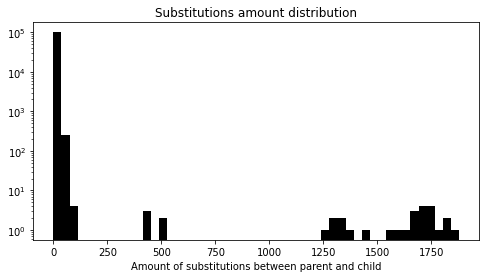

In [9]:
SUBSTITUTIONS_PATH = "../data/overall_mutations_with_context.json"
CUTOFF = 76

with open(SUBSTITUTIONS_PATH) as fin:
    substitutions = json.load(fin)
    
print(len(substitutions))
filtered_subst = [x for x in substitutions if len(x[-1]) < CUTOFF]  # drop 34 elements
print(len(filtered_subst))

plt.figure(figsize=(8, 4))
plt.title("Substitutions amount distribution")
plt.hist([len(x[-1]) for x in substitutions], bins=50, color='k')
plt.yscale("log")
plt.xlabel("Amount of substitutions between parent and child")
plt.show()

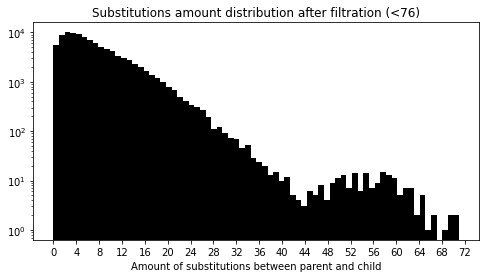

In [11]:
plt.figure(figsize=(8, 4))
plt.title(f"Substitutions amount distribution after filtration (<{CUTOFF})")
plt.hist([len(x[-1]) for x in filtered_subst], bins=72, color='k')
plt.yscale("log")
plt.xlabel("Amount of substitutions between parent and child")
plt.xticks(range(0, 76, 4));

(0.0, 20.0)

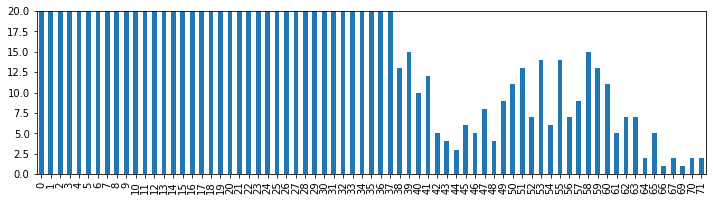

In [17]:
plt.figure(figsize=(12, 3))
pd.Series([len(x[-1]) for x in filtered_subst]).value_counts().sort_index().plot.bar()
plt.ylim((0, 20))

In [8]:
# look on names to see locations
for nname in np.array([x[:2] for x in filtered_subst if len(x[-1]) >= 43]).flatten():
    if nname.startswith('h'):
        print(nname)

hCoV-19/USA/CA-CHLA-PLM51341617/2020|EPI_ISL_753676|2020-12-17
hCoV-19/Germany/HE-Cento-37589124/2020|EPI_ISL_815278|2020-08-17
hCoV-19/France/PAC-MEPHI-2069/2020|EPI_ISL_644489|2020-09-22
hCoV-19/France/ARA97311/2020|EPI_ISL_640010|2020-10-29
hCoV-19/England/MILK-970B2F/2020|EPI_ISL_553097|2020-08-18
hCoV-19/England/MILK-973649/2020|EPI_ISL_575851|2020-08-20
hCoV-19/France/Bre-IPP11282/2020|EPI_ISL_832153|2020-11-27
hCoV-19/France/Bre-IPP11287/2020|EPI_ISL_832158|2020-11-26
hCoV-19/USA/NY-QDX-2747/2020|EPI_ISL_661254|2020-03-17
hCoV-19/USA/TX-HMH-MCoV-9702/2020|EPI_ISL_780232|2020-07-03
hCov19/France/Mayotte-IPP00171/2021|EPI_ISL_855364|2021-01-06
hCoV-19/USA/TX-HMH-5955/2020|EPI_ISL_547119|2020-06-30
hCoV-19/USA/TX-HMH-MCoV-13693/2020|EPI_ISL_788789|2020-08-19
hCoV-19/USA/TX-HMH-8012/2020|EPI_ISL_545791|2020-07-01
hCoV-19/USA/NM-DOH-2020308915/2020|EPI_ISL_602188|2020-08-24
hCoV-19/USA/TX-HMH-6522/2020|EPI_ISL_546055|2020-06-27
hCoV-19/Germany/NW-ChVir-D1925-5947/2020|EPI_ISL_754193|

In [36]:
# node names for passing to arheopterix for labeling

# all 
# ",".join(np.array([x[:2] for x in substitutions if len(x[-1]) >= 750]).flatten())

# only 43 <= x < 76
cutoff = 43
sss = [x[:2] for x in substitutions if len(x[-1]) > cutoff]
print(len(sss), len(set([x for y in sss for x in y])))

",".join(set(np.array(sss).flatten()))

223 375


'#8392#,#26560#,hCoV-19/USA/TX-HMH-MCoV-9702/2020|EPI_ISL_780232|2020-07-03,hCoV-19/Scotland/QEUH-F8A7FB/2021|EPI_ISL_857943|2021-01-09,#8349#,hCoV-19/USA/TX-HMH-MCoV-12606/2020|EPI_ISL_790415|2020-08-31,hCoV-19/England/CAMC-FB1BE0/2021|EPI_ISL_857561|2021-01-10,#22920#,hCoV-19/Netherlands/NH-RIVM-20765/2020|EPI_ISL_790908|2020-12-23,#36189#,hCoV-19/England/CAMC-FB3F6A/2021|EPI_ISL_857734|2021-01-11,#16108#,hCoV-19/USA/TX-HMH-3406/2020|EPI_ISL_544166|2020-06-11,#45304#,hCoV-19/Wales/ALDP-CE1CD8/2020|EPI_ISL_858853|2020-12-26,hCoV-19/USA/TX-HMH-MCoV-10648/2020|EPI_ISL_789574|2020-07-06,hCoV-19/Denmark/DCGC-31283/2021|EPI_ISL_855663|2021-01-11,hCoV-19/Scotland/QEUH-EF84C5/2021|EPI_ISL_858264|2021-01-05,hCoV-19/Germany/HE-Cento-37589124/2020|EPI_ISL_815278|2020-08-17,#21955#,hCoV-19/USA/CA-UCLA-240/2020|EPI_ISL_537546|2020-06-20,hCoV-19/USA/TX-HMH-MCoV-9462/2020|EPI_ISL_781135|2020-07-03,#26538#,#35560#,hCoV-19/USA/TX-HMH-8072/2020|EPI_ISL_545838|2020-07-01,#8388#,hCoV-19/Scotland/QEUH-D1

In [34]:
len(set([x for y in sss for x in y]))

46

In [28]:
len(set(np.array([x[:2] for x in substitutions if len(x[-1]) > 76]).flatten()))

46

In [27]:
'hCoV-19/USA/NC-UNC-0005/2021|EPI_ISL_832121|2021-01-04,#31107#,hCoV-19/USA/NC-UNC-0021/2020|EPI_ISL_832085|2020-04,#33902#,#1230#,#23389#,#27690#,hCoV-19/Belgium/rega-10061035/2020|EPI_ISL_735056|2020-10-06,hCoV-19/Netherlands/NB-RIVM-21175/2020|EPI_ISL_824090|2020-12-22,#45483#,#33899#,hCoV-19/USA/WI-UW-2550/2020|EPI_ISL_779379|2020-12-29,hCoV-19/Japan/IC-0022/2020|EPI_ISL_591536|2020-04,#27685#,#42184#,#31112#,hCoV-19/Luxembourg/LNS0102726/2020|EPI_ISL_739711|2020-10-31,hCoV-19/Netherlands/NH-RIVM-20765/2020|EPI_ISL_790908|2020-12-23,#36189#,hCoV-19/Netherlands/NoordHolland_8/2020|EPI_ISL_460797|2020-04-01,#44701#,#46067#,#17924#,hCoV-19/Denmark/DCGC-6883/2020|EPI_ISL_619728|2020-10-12,hCoV-19/Japan/IC-0283/2020|EPI_ISL_667712|2020-11,#38093#,#41030#,#8376#,#39687#,hCoV-19/Switzerland/BL-42471501/2020|EPI_ISL_842647|2020-10-06,hCoV-19/Japan/PG-0849/2020|EPI_ISL_684459|2020-04,#45379#,hCoV-19/Netherlands/ZH-EMC-1262/2020|EPI_ISL_802519|2020-12-30,#43186#,hCoV-19/Belgium/rega-10061043/2020|EPI_ISL_735063|2020-10-06,#9379#,#10797#,#46570#,hCoV-19/Denmark/DCGC-7479/2020|EPI_ISL_619379|2020-10-12,hCoV-19/USA/LA-EVTL728/2020|EPI_ISL_666609|2020-07-16,#17932#,hCoV-19/USA/UN-CDC-7650/2020|EPI_ISL_514128|2020-04-24,#23396#,#1248#,hCoV-19/England/ALDP-C3AB97/2020|EPI_ISL_731418|2020-12-09,#1231#'.count(',')

45

In [8]:
# Name: hCoV-19/Netherlands/ZH-EMC-1262/2020|EPI_ISL_802519|2020-12-30
# Name: hCoV-19/England/CAMC-FB1649/2021|EPI_ISL_857851|2021-01-10
sample_seq = get_sequence("hCoV-19/England/CAMC-FB1649/2021|EPI_ISL_857851|2021-01-10")

sample_seq

'------------------------------------------------------AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCTGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

### Release subtree for visualization

In [2]:
path = "../data/mulal_gisaid_2021-01-22.filtered.fasta.prank.anc.dnd"
t = PhyloTree(path, format=1)

In [3]:
# Name: #50310#
subt = t.search_nodes(name='#50310#')[0]

In [4]:
len(subt)

1941

In [6]:
subt.write(outfile="../data/sub_tree_with_mode2_samples.nwk", format=1)